
[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


MNIST shapes: (60000, 28, 28) (10000, 28, 28)


C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 - 29s - 69ms/step - accuracy: 0.9095 - loss: 0.2961 - val_accuracy: 0.9828 - val_loss: 0.0599
Epoch 2/15
422/422 - 21s - 51ms/step - accuracy: 0.9748 - loss: 0.0827 - val_accuracy: 0.9880 - val_loss: 0.0425
Epoch 3/15
422/422 - 22s - 52ms/step - accuracy: 0.9812 - loss: 0.0618 - val_accuracy: 0.9897 - val_loss: 0.0366
Epoch 4/15
422/422 - 47s - 111ms/step - accuracy: 0.9851 - loss: 0.0490 - val_accuracy: 0.9902 - val_loss: 0.0341
Epoch 5/15
422/422 - 36s - 86ms/step - accuracy: 0.9870 - loss: 0.0409 - val_accuracy: 0.9892 - val_loss: 0.0351
Epoch 6/15
422/422 - 25s - 60ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9912 - val_loss: 0.0319
Epoch 7/15
422/422 - 32s - 76ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.9915 - val_loss: 0.0307
Epoch 8/15
422/422 - 26s - 62ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9908 - val_loss: 0.0325
Epoch 9/15
422/422 - 32s - 76ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9912 -

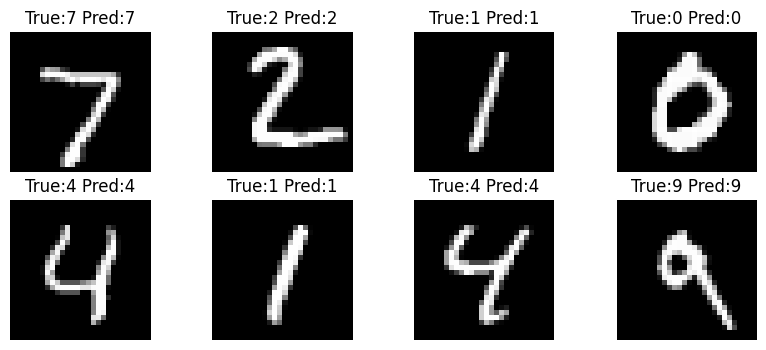

Saved MNIST model to mnist_cnn.h5


In [6]:
# Task 3: Handwritten Character Recognition (MNIST) using Keras CNN
# Run in Jupyter.

!pip install -q tensorflow matplotlib

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers, utils
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import tensorflow as tf

# 1) Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("MNIST shapes:", x_train.shape, x_test.shape)

# 2) Preprocess: normalize and reshape for CNN
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # (N, 28, 28, 1)
x_test  = np.expand_dims(x_test, -1)

num_classes = 10
y_train_cat = utils.to_categorical(y_train, num_classes)
y_test_cat  = utils.to_categorical(y_test, num_classes)

# 3) Build CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 4) Train
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train_cat, validation_split=0.1, epochs=15, batch_size=128, callbacks=[es], verbose=2)

# 5) Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# 6) Detailed classification report
y_pred = model.predict(x_test).argmax(axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# 7) Plot some predictions
plt.figure(figsize=(10,4))
for i in range(8):
    ax = plt.subplot(2,4,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"True:{y_test[i]} Pred:{y_pred[i]}")
    plt.axis('off')
plt.show()

# 8) Save model
model.save("mnist_cnn.h5")
print("Saved MNIST model to mnist_cnn.h5")
